Import libraries

In [7]:
from Model.svm_smo import *
from Model.svm_plot_2D import *
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from Plots.Prediction_plots import *
Plots = Prediction_plots()

Create train and test sets

In [8]:
X, y = make_blobs(n_samples=300, centers=2, random_state=17, cluster_std=2)
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=17, test_size=0.2)

Call created SVM_SMO model

In [9]:
kernels = ["linear", "rbf", "poly"]
for i in kernels:
    model = Support_Vector_Machines_SMO(kernel=i, C=1, degree=3, gamma=1, max_iter=500)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("Kernel: {}".format(i))
    print("Intercept: {}".format(model.b))
    try:
        print("Coefficient: {}".format(model.w))
    except:
        pass
    print("Number of support vectors: {}".format(len(model.support_vectors_)))

Kernel: linear
Intercept: -5.250703575638592
Coefficient: [-0.3463809  -0.72835901]
Number of support vectors: 16
Iterations exceeded max_iter
Kernel: rbf
Intercept: 0.03764078363867533
Number of support vectors: 191
Kernel: poly
Intercept: 13.959306217115609
Number of support vectors: 123


Confussion matrix

Iterations exceeded max_iter
TRAIN:


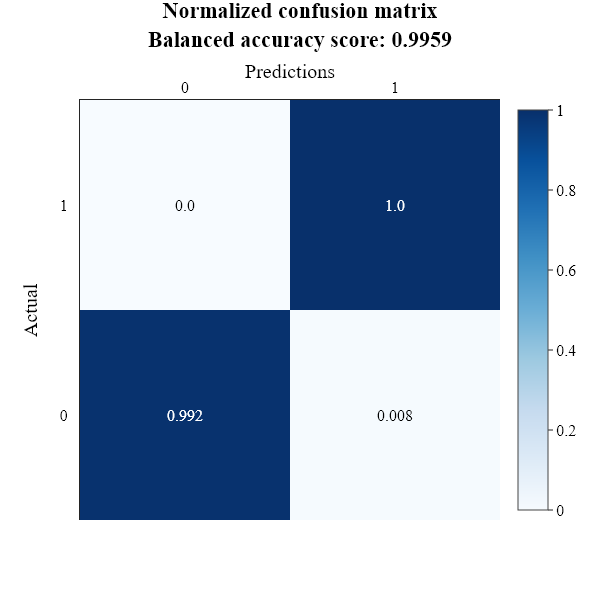

TEST:


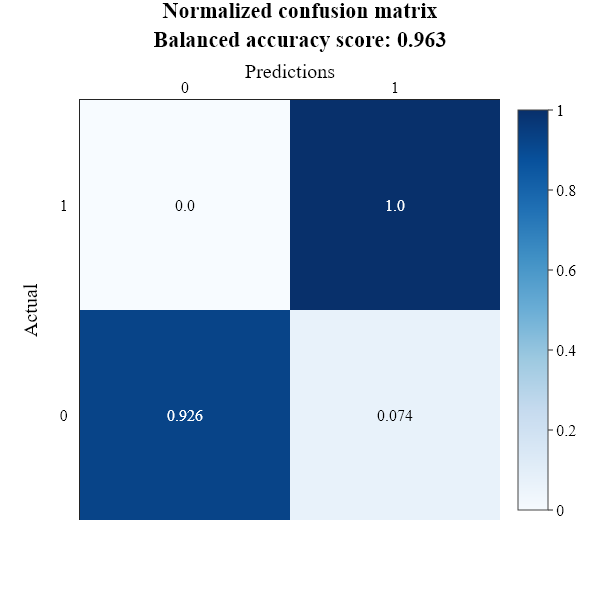

In [10]:
model = Support_Vector_Machines_SMO(kernel="rbf", C=1, gamma=1, max_iter=500)
model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
print("TRAIN:")
Plots.conf_matrix(y_true=y_train, y_pred=y_pred_train, normalize=True)
print("TEST:")
Plots.conf_matrix(y_true=y_test, y_pred=y_pred_test, normalize=True)

Plot hyperplane of SVM for different values of C

Linear kernel

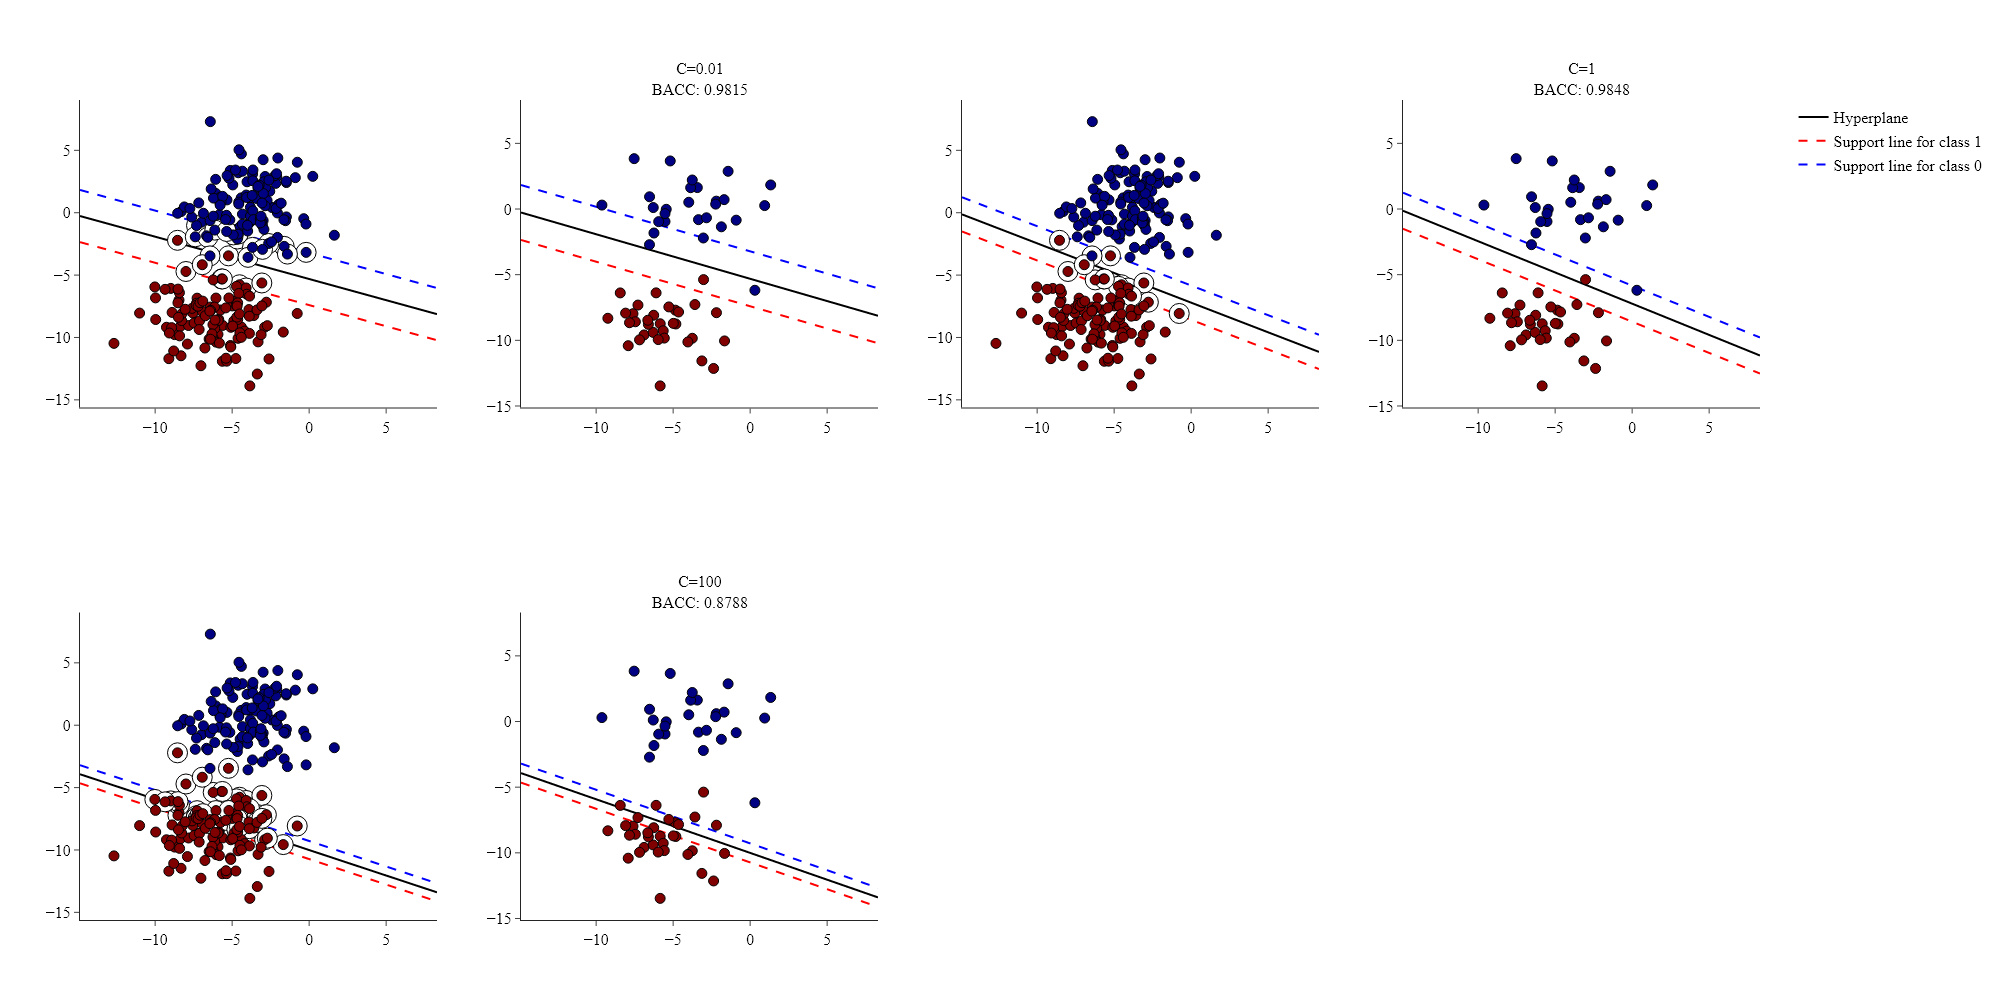

In [11]:
svm_plots_with_test(X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, values=[0.01, 1, 100], param_name="C", kernel="linear").create_subplot()

Plot hyperplane of SVM for different values of gamma

RBF kernel

Iterations exceeded max_iter
Iterations exceeded max_iter


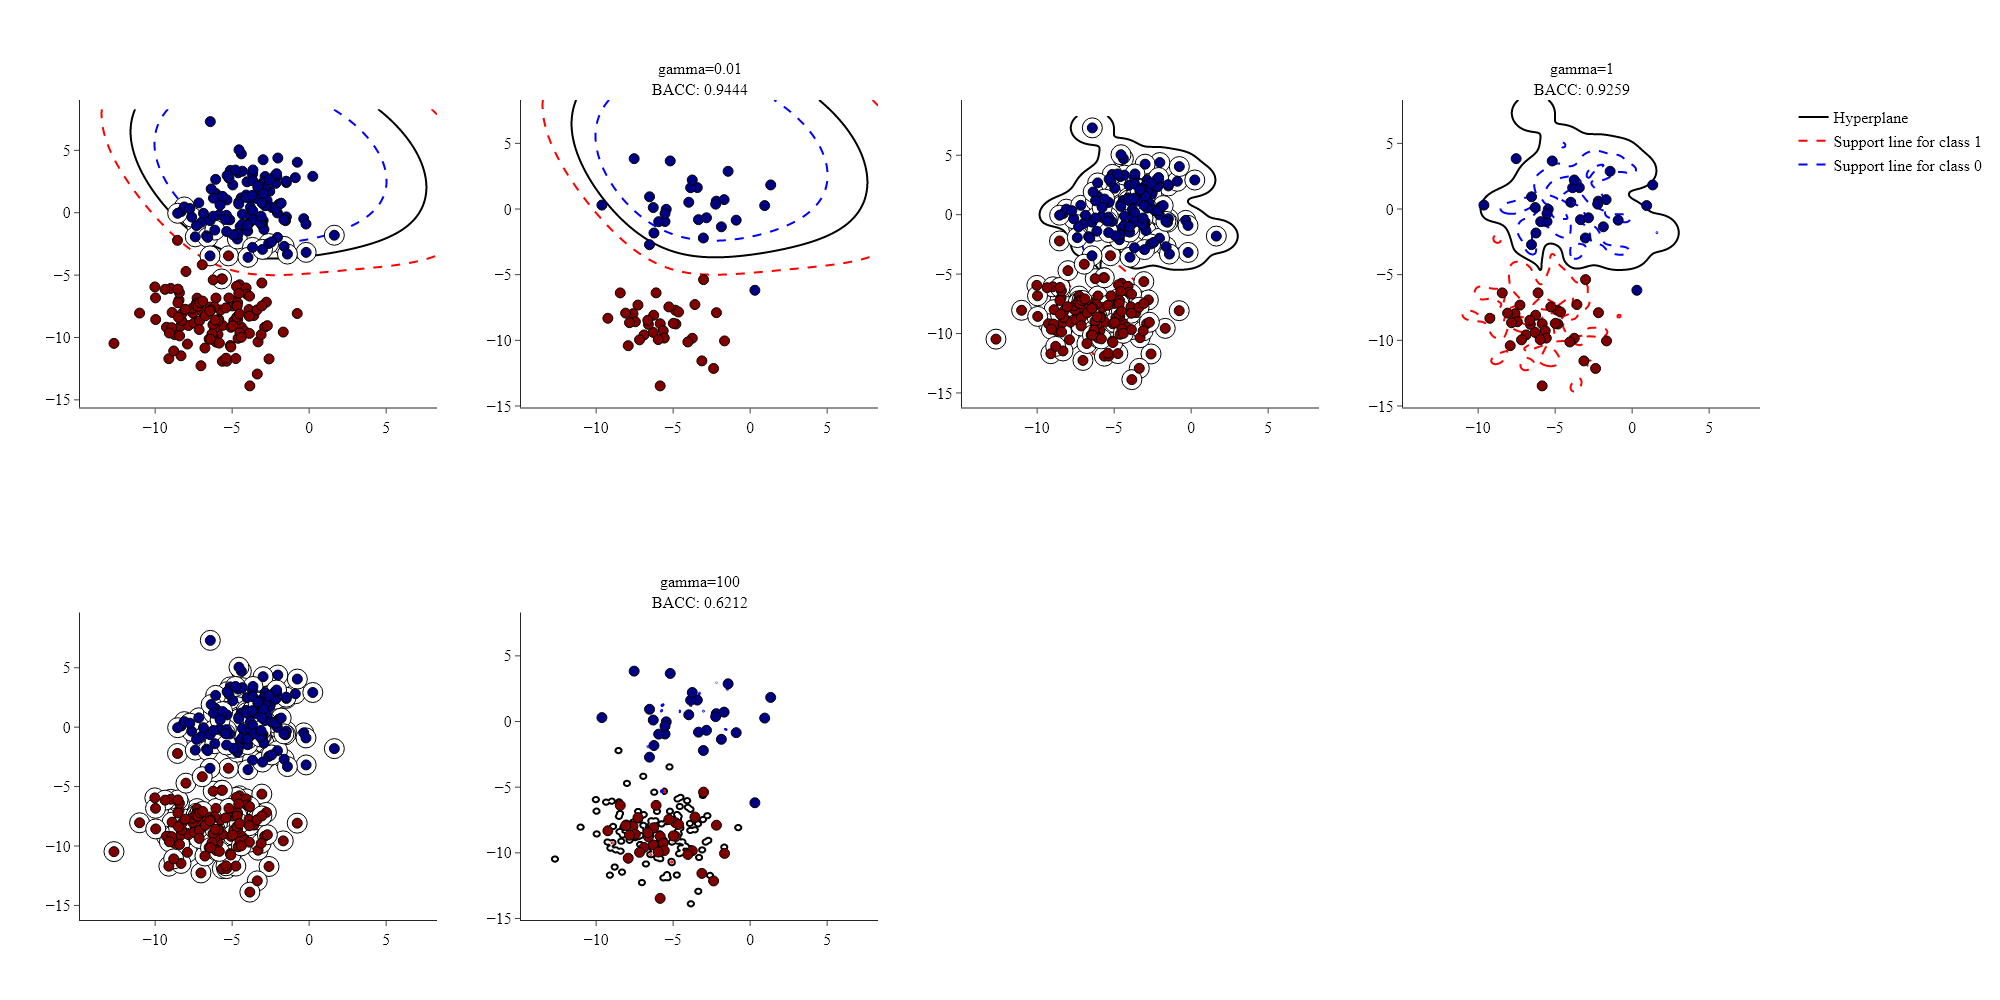

In [12]:
svm_plots_with_test(X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, values=[0.01, 1, 100], param_name="gamma", kernel="rbf").create_subplot()